In [1]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats
import sys

In [2]:
matrixMalEX="data_GG.csv"
matrixMal="data_GM.csv"
matrixIt="data_L.csv"
matrixIt_Total="data_L_Total.csv"
n_qty=2 #CAMBIAR SEGUN LA CANTIDAD DE NODOS USADOS
n_groups= 2
repet = 10 #CAMBIAR EL PRIMER NUMERO SEGUN NUMERO DE EJECUCIONES POR CONFIG

p_value = 0.05
values = [2, 10, 20, 40]
#                      WORST          BEST
dist_names = ['null', 'BalancedFit', 'CompactFit']

processes = [1,10,20,40,80,160]

labelsP = [['(2,2)', '(2,10)', '(2,20)', '(2,40)'],['(10,2)', '(10,10)', '(10,20)', '(10,40)'],
          ['(20,2)', '(20,10)', '(20,20)', '(20,40)'],['(40,2)', '(40,10)', '(40,20)', '(40,40)']]
labelsP_J = ['(2,2)', '(2,10)', '(2,20)', '(2,40)','(10,2)', '(10,10)', '(10,20)', '(10,40)',
              '(20,2)', '(20,10)', '(20,20)', '(20,40)','(40,2)', '(40,10)', '(40,20)', '(40,40)']
positions = [321, 322, 323, 324, 325]
positions_small = [221, 222, 223, 224]

In [21]:
dfG = pd.read_csv( matrixMalEX )

dfG = dfG.drop(columns=dfG.columns[0])
dfG['S'] = dfG['N']
dfG['N'] = dfG['S'] + dfG['%Async']
dfG['%Async'] = (dfG['%Async'] / dfG['N']) * 100
dfG['%Async'] = dfG['%Async'].fillna(0)

if(n_qty == 1):
    group = dfG.groupby(['%Async', 'Cst', 'Css', 'Groups'])['TE']
    group2 = dfG.groupby(['%Async', 'Cst', 'Css', 'NP','NS'])['TE']
else:        
    group = dfG.groupby(['Dist', '%Async', 'Cst', 'Css', 'Groups'])['TE']
    group2 = dfG.groupby(['Dist', '%Async', 'Cst', 'Css', 'NP','NS'])['TE']

grouped_aggG = group.agg(['median'])
grouped_aggG.rename(columns={'median':'TE'}, inplace=True)

grouped_aggG2 = group2.agg(['median'])
grouped_aggG2.rename(columns={'median':'TE'}, inplace=True)

In [22]:
dfM = pd.read_csv( matrixMal )
dfM = dfM.drop(columns=dfM.columns[0])

dfM['S'] = dfM['N']
dfM['N'] = dfM['S'] + dfM['%Async']
dfM["TR"] = dfM["TC"] + dfM["TH"] + dfM["TS"] + dfM["TA"]
dfM['%Async'] = (dfM['%Async'] / dfM['N']) * 100

dfM['%Async'] = dfM['%Async'].fillna(0)

#dfM = dfM.drop(dfM.loc[(dfM["Cst"] == 3) & (dfM["Css"] == 1) & (dfM["NP"] > dfM["NS"])].index)
#dfM = dfM.drop(dfM.loc[(dfM["Cst"] == 2) & (dfM["Css"] == 1) & (dfM["NP"] > dfM["NS"])].index)

if(n_qty == 1):
    groupM = dfM.groupby(['%Async', 'Cst', 'Css', 'NP', 'NS'])['TC', 'TH', 'TS', 'TA', 'TR']
else:
    groupM = dfM.groupby(['Dist', '%Async', 'Cst', 'Css', 'NP', 'NS'])['TC', 'TH', 'TS', 'TA', 'TR']

#group
grouped_aggM = groupM.agg(['median'])
grouped_aggM.columns = grouped_aggM.columns.get_level_values(0)

In [5]:
dfL = pd.read_csv( matrixIt )
dfL = dfL.drop(columns=dfL.columns[0])

dfL['%Async'] = dfL['%Async'].fillna(0)

#dfL = dfL.drop(dfL.loc[(dfL["Cst"] == 3) & (dfL["Css"] == 1) & (dfL["NP"] > dfL["NS"])].index)
#dfL = dfL.drop(dfL.loc[(dfL["Cst"] == 2) & (dfL["Css"] == 1) & (dfL["NP"] > dfL["NS"])].index)

if(n_qty == 1):
    groupL = dfL[dfL['NS'] != 0].groupby(['Tt', '%Async', 'Cst', 'Css', 'NP', 'NS'])['Ti', 'To']
else:
    groupL = dfL[dfL['NS'] != 0].groupby(['Tt', 'Dist', '%Async', 'Cst', 'Css', 'NP', 'NS'])['Ti', 'To']

#group
grouped_aggL = groupL.agg(['median', 'count'])
grouped_aggL.columns = grouped_aggL.columns.get_level_values(0)
grouped_aggL.set_axis(['Ti', 'Iters', 'To', 'Iters2'], axis='columns')

grouped_aggL['Iters'] = np.round(grouped_aggL['Iters']/repet)
grouped_aggL['Iters2'] = np.round(grouped_aggL['Iters2']/repet)

/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.


In [6]:
dfLT = pd.read_csv( matrixIt_Total )
dfLT = dfLT.drop(columns=dfLT.columns[0])

dfLT['%Async'] = dfLT['%Async'].fillna(0)

#dfL = dfL.drop(dfL.loc[(dfL["Cst"] == 3) & (dfL["Css"] == 1) & (dfL["NP"] > dfL["NS"])].index)
#dfL = dfL.drop(dfL.loc[(dfL["Cst"] == 2) & (dfL["Css"] == 1) & (dfL["NP"] > dfL["NS"])].index)

if(n_qty == 1):
    groupLT = dfLT[dfLT['NS'] != 0].groupby(['%Async', 'Cst', 'Css', 'NP', 'NS'])['Sum']
else:
    groupLT = dfLT[dfLT['NS'] != 0].groupby(['Dist', '%Async', 'Cst', 'Css', 'NP', 'NS'])['Sum']

#group
grouped_aggLT = groupLT.agg(['median'])
grouped_aggLT.columns = grouped_aggLT.columns.get_level_values(0)
grouped_aggLT.set_axis(['Sum'], axis='columns')

/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.


In [23]:
grouped_aggL.to_excel("resultL.xlsx") 
grouped_aggLT.to_excel("resultLT.xlsx")
dfLT.to_excel("resultLT_all.xlsx")
grouped_aggM.to_excel("resultM.xlsx") 
grouped_aggG2.to_excel("resultG.xlsx") 

In [8]:
dfG

N  %Async Groups  NP  NS Dist  Matrix  CommTam  Cst  Css  Time Iters  \
0     0     0.0  20,80  20  80  2,2  100000        0    3    0   4.0  3,97   
1     0     0.0  20,80  20  80  2,2  100000        0    3    0   4.0  3,97   
2     0     0.0  20,80  20  80  2,2  100000        0    3    0   4.0  3,97   
3     0     0.0  20,80  20  80  2,2  100000        0    3    0   4.0  3,97   
4     0     0.0  20,80  20  80  2,2  100000        0    3    0   4.0  3,97   
...  ..     ...    ...  ..  ..  ...     ...      ...  ...  ...   ...   ...   
2395  0     0.0  40,80  40  80  2,2  100000        0    0    1   4.0  3,97   
2396  0     0.0  40,80  40  80  2,2  100000        0    0    1   4.0  3,97   
2397  0     0.0  40,80  40  80  2,2  100000        0    0    1   4.0  3,97   
2398  0     0.0  40,80  40  80  2,2  100000        0    0    1   4.0  3,97   
2399  0     0.0  40,80  40  80  2,2  100000        0    0    1   4.0  3,97   

            TE  S  
0     6.634278  0  
1     6.671452  0  
2     6.528489  0  
3     6.598294  0  
4     6.580460  0  
...        ... ..  
2395  7.632454  0  
2396  7.279475  0  
2397  7.590942  0  
2398  7.298454  0  
2399  7.356583  0  

[2400 rows x 14 columns]

In [9]:
grouped_aggG

TE
Dist %Async Cst Css Groups            
2,2  0.0    0   0   1,10     51.150761
                    1,160    15.706663
                    1,20     32.814834
                    1,40     22.719029
                    1,80     17.936359
...                                ...
            3   1   80,1    388.108210
                    80,10    39.045234
                    80,160    3.600383
                    80,20    19.728576
                    80,40    10.049131

[240 rows x 1 columns]

In [10]:
dfM

N  %Async  NP  NS Dist  Matrix  CommTam  Cst  Css  Time Iters        TC  \
0     0     0.0  20  80  2,2  100000        0    3    0   4.0  3,97  1.213137   
1     0     0.0  20  80  2,2  100000        0    3    0   4.0  3,97  1.308836   
2     0     0.0  20  80  2,2  100000        0    3    0   4.0  3,97  1.135379   
3     0     0.0  20  80  2,2  100000        0    3    0   4.0  3,97  1.217985   
4     0     0.0  20  80  2,2  100000        0    3    0   4.0  3,97  1.192607   
...  ..     ...  ..  ..  ...     ...      ...  ...  ...   ...   ...       ...   
2395  0     0.0  40  80  2,2  100000        0    0    1   4.0  3,97  2.351927   
2396  0     0.0  40  80  2,2  100000        0    0    1   4.0  3,97  2.027680   
2397  0     0.0  40  80  2,2  100000        0    0    1   4.0  3,97  2.312305   
2398  0     0.0  40  80  2,2  100000        0    0    1   4.0  3,97  1.998197   
2399  0     0.0  40  80  2,2  100000        0    0    1   4.0  3,97  2.088411   

            TH   TS   TA  S        TR  
0     0.975649  0.0  0.0  0  2.188786  
1     1.046099  0.0  0.0  0  2.354935  
2     1.060276  0.0  0.0  0  2.195655  
3     0.957856  0.0  0.0  0  2.175841  
4     0.933632  0.0  0.0  0  2.126239  
...        ...  ...  ... ..       ...  
2395  0.000000  0.0  0.0  0  2.351927  
2396  0.000000  0.0  0.0  0  2.027680  
2397  0.000000  0.0  0.0  0  2.312305  
2398  0.000000  0.0  0.0  0  1.998197  
2399  0.000000  0.0  0.0  0  2.088411  

[2400 rows x 17 columns]

In [11]:
grouped_aggM

TC   TH   TS   TA        TR
Dist %Async Cst Css NP  NS                                    
2,2  0.0    0   0   1   10   0.330893  0.0  0.0  0.0  0.330893
                        20   1.245451  0.0  0.0  0.0  1.245451
                        40   0.890816  0.0  0.0  0.0  0.890816
                        80   0.919644  0.0  0.0  0.0  0.919644
                        160  1.176074  0.0  0.0  0.0  1.176074
...                               ...  ...  ...  ...       ...
            3   1   160 1    0.040586  0.0  0.0  0.0  0.040586
                        10   0.043647  0.0  0.0  0.0  0.043647
                        20   0.040643  0.0  0.0  0.0  0.040643
                        40   0.109038  0.0  0.0  0.0  0.109038
                        80   0.131250  0.0  0.0  0.0  0.131250

[240 rows x 5 columns]

In [25]:
dfL

N  %Async  NP  N_par  NS  Dist  Compute_tam  Comm_tam  Cst  Css  Time  \
0       0     0.0  20      0  80     2       100000         0    3    0   4.0   
1       0     0.0  20      0  80     2       100000         0    3    0   4.0   
2       0     0.0  20      0  80     2       100000         0    3    0   4.0   
3       0     0.0  20      0  80     2       100000         0    3    0   4.0   
4       0     0.0  20      0  80     2       100000         0    3    0   4.0   
...    ..     ...  ..    ...  ..   ...          ...       ...  ...  ...   ...   
239995  0     0.0  40      0  80     2       100000         0    0    1   4.0   
239996  0     0.0  40      0  80     2       100000         0    0    1   4.0   
239997  0     0.0  40      0  80     2       100000         0    0    1   4.0   
239998  0     0.0  40      0  80     2       100000         0    0    1   4.0   
239999  0     0.0  40      0  80     2       100000         0    0    1   4.0   

        Iters        Ti   Tt     To  
0           3  0.199811  0.0  224.0  
1           3  0.199813  0.0  224.0  
2           3  0.199895  0.0  224.0  
3           3  0.424027  1.0  224.0  
4           3  0.532020  1.0  224.0  
...       ...       ...  ...    ...  
239995      3  0.099933  0.0  112.0  
239996      3  0.099903  0.0  112.0  
239997      3  0.099926  0.0  112.0  
239998      3  0.100183  0.0  112.0  
239999      3  0.099943  0.0  112.0  

[240000 rows x 15 columns]

In [8]:
grouped_aggL

Ti  Iters      To  Iters2
Tt  Dist %Async Cst Css NP NS                                  
0.0 2    0.0    0   0   1  10   1.999120    3.0  2242.0     3.0
                           20   1.999183    3.0  2242.0     3.0
                           40   1.999150    3.0  2242.0     3.0
                           80   1.999131    3.0  2242.0     3.0
                           160  1.999115    3.0  2242.0     3.0
...                                  ...    ...     ...     ...
1.0 2    0.0    1   3   20 80   0.105980    1.0   112.0     1.0
                           160  0.105645    1.0   112.0     1.0
                        40 80   0.068359    1.0    56.0     1.0
                           160  0.052386    1.0    56.0     1.0
                        80 160  0.026651    2.0    28.0     2.0

[330 rows x 4 columns]

In [202]:
auxIter = pd.DataFrame(dfM['Iters'].str.split(',',1).tolist(),columns = ['Iters0','Iters1'])
auxIter['Iters1'] = pd.to_numeric(auxIter['Iters1'], errors='coerce')
iters = auxIter['Iters1'].mean()
print(iters)


10.0


A partir de aquí se muestran gráficos

In [204]:
#Reserva de memoria para las estructuras
TP_data=[0]*2
TH_data=[0]*2
TM_data=[0]*2

TP_A_data=[0]*2
TH_A_data=[0]*2
TM_A_data=[0]*2

for dist in [1,2]:
    dist_index=dist-1
    
    TP_data[dist_index]=[0]*len(values)*(len(values))
    TH_data[dist_index]=[0]*len(values)*(len(values))
    TM_data[dist_index]=[0]*len(values)*(len(values))

    TP_A_data[dist_index]=[0]*len(values)*(len(values))
    TH_A_data[dist_index]=[0]*len(values)*(len(values))
    TM_A_data[dist_index]=[0]*len(values)*(len(values))

# Obtencion de los grupos del dataframe necesarios

#ACTUALMENTE NO SE DIFERENCIAN LOS TIEMPOS DE ITERACIONES DE PADRES E HIJOS CUANDO COINCIDE EL NUMERO DE PROCESOS
if(n_qty == 1):
    groupM_aux = dfM.groupby(['NP', 'NS'])['TC']
    groupL_aux = dfL[dfL['Tt'] == 0].groupby(['NP'])['Ti']
else:
    groupM_aux = dfM.groupby(['NP', 'NS', 'Dist'])['TC']
    groupL_aux = dfL[dfL['Tt'] == 0].groupby(['Dist', 'NP'])['Ti']

grouped_aggM_aux = groupM_aux.agg(['mean'])
grouped_aggM_aux.columns = grouped_aggM_aux.columns.get_level_values(0)

grouped_aggL_aux = groupL_aux.agg(['mean'])
grouped_aggL_aux.columns = grouped_aggL_aux.columns.get_level_values(0)
grouped_aggL_aux.set_axis(['Ti'], axis='columns')

#Calculo de los valores para las figuras
#1=Best Fit
#2=Worst Fit
dist=1
for dist in [1,2]:
    dist_index=dist-1
    dist_v = str(dist)+","+str(dist)
    i=0
    r=0
    for numP in values:
        j=0
        for numC in values:
        
            tc_real = grouped_aggM_aux.loc[(numP,numC,dist_v)]['mean']
            for tipo in [0]: #TODO Poner a 0,100
                iters_aux=dfM[(dfM["NP"] == numP)][(dfM["NS"] == numC)][(dfM["Dist"] == dist_v)][(dfM["%Async"] == tipo)]['Iters'].head(1).tolist()[0].split(',')
                itersP_aux = int(iters_aux[0])
                itersS_aux = int(iters_aux[1])
                iters_mal_aux = 0
                if tipo != 0:
                    iters_mal_aux = grouped_aggL['Iters'].loc[(1,dist,tipo,numP,numC)]
            
                t_iterP_aux = grouped_aggL_aux['Ti'].loc[(dist,numP)]
                t_iterS_aux = grouped_aggL_aux['Ti'].loc[(dist,numC)]
            
            
                p1 = t_iterP_aux * itersP_aux
                p2 = t_iterS_aux * max((itersS_aux - iters_mal_aux),0)
                
                array_aux = grouped_aggM[['TS', 'TA']].loc[(dist_v,tipo,numP,numC)].tolist()
                p3 = tc_real + array_aux[0] + array_aux[1]
                
                #Guardar datos
                if tipo == 0:
                    TP_data[dist_index][i*len(values) + j] = p1
                    TH_data[dist_index][i*len(values) + j] = p2
                    TM_data[dist_index][i*len(values) + j] = p3
                else:
                    TP_A_data[dist_index][i*len(values) + j] = p1
                    TH_A_data[dist_index][i*len(values) + j] = p2
                    TM_A_data[dist_index][i*len(values) + j] = p3
            j+=1
        i+=1
print(TP_data)
print(TH_data)
print(TM_data)

[[0.21241231578947362, 0.21241231578947362, 0.21241231578947362, 0.21241231578947362, 0.04632109565217393, 0.04632109565217393, 0.04632109565217393, 0.04632109565217393, 0.025296672413793103, 0.025296672413793103, 0.025296672413793103, 0.025296672413793103, 0.0355868547008547, 0.0355868547008547, 0.0355868547008547, 0.0355868547008547], [0.1981199732142857, 0.1981199732142857, 0.1981199732142857, 0.1981199732142857, 0.06233977876106192, 0.06233977876106192, 0.06233977876106192, 0.06233977876106192, 0.026912142857142853, 0.026912142857142853, 0.026912142857142853, 0.026912142857142853, 0.0343439649122807, 0.0343439649122807, 0.0343439649122807, 0.0343439649122807]]
[[2.1241231578947364, 0.4632109565217393, 0.25296672413793103, 0.35586854700854703, 2.1241231578947364, 0.4632109565217393, 0.25296672413793103, 0.35586854700854703, 2.1241231578947364, 0.4632109565217393, 0.25296672413793103, 0.35586854700854703, 2.1241231578947364, 0.4632109565217393, 0.25296672413793103, 0.3558685470085470

/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


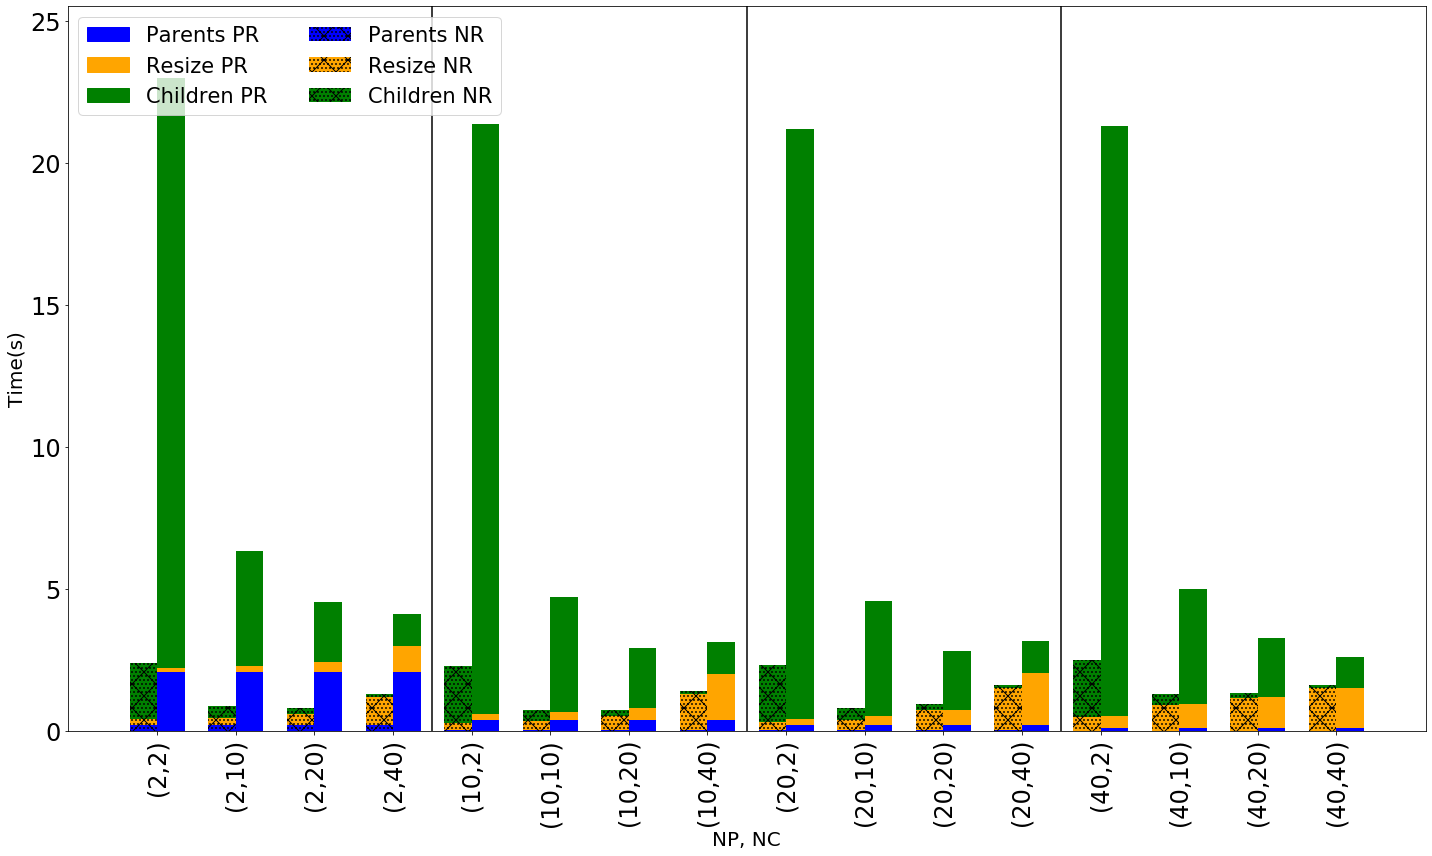

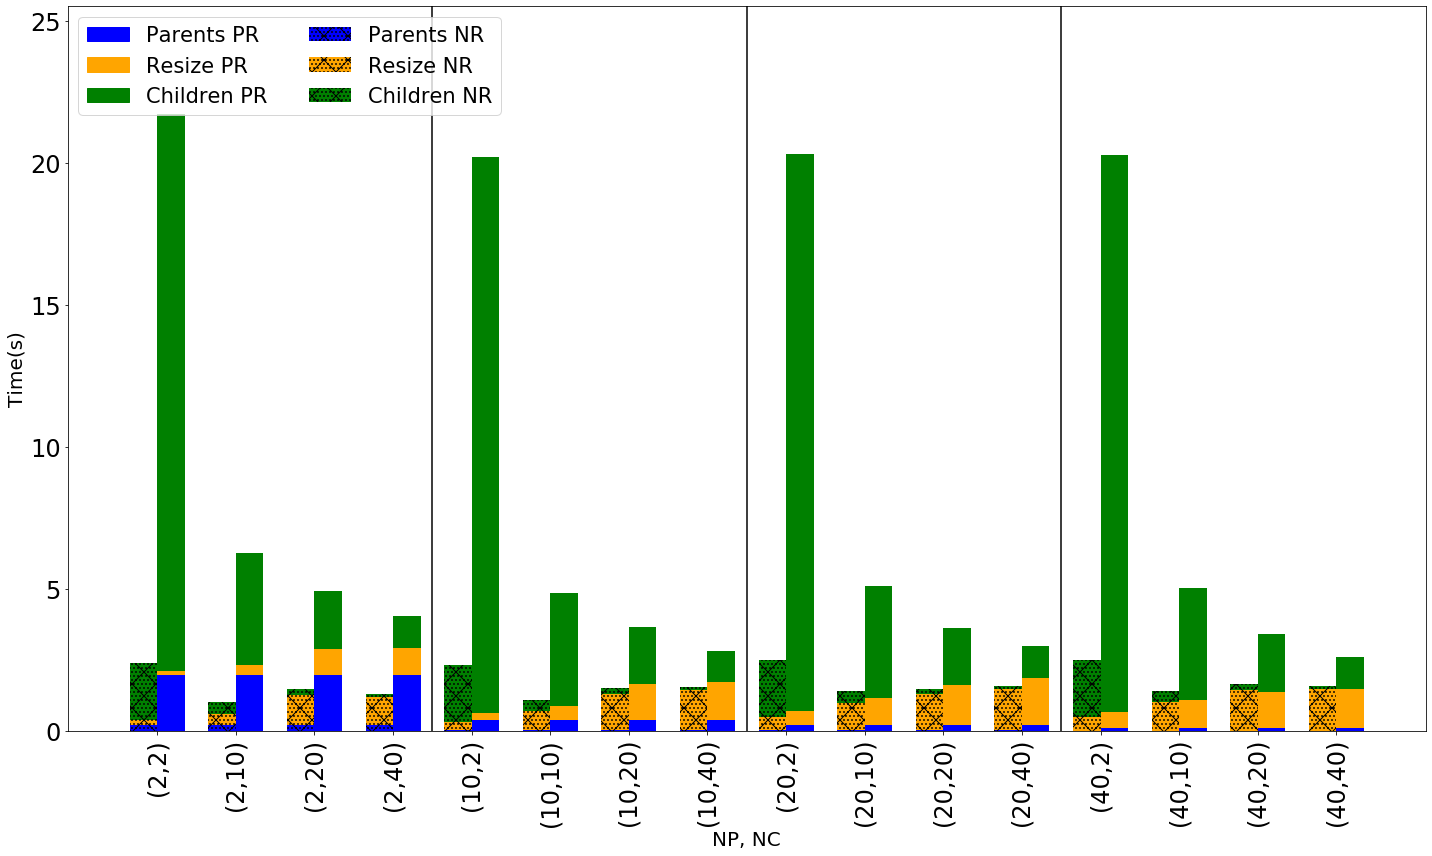

In [37]:
#TP_A_data=[[0.1997793257575758, 0.1997793257575758, 0.1997793257575758, 0.1997793257575758, 0.040469166666666695, 0.040469166666666695, 0.040469166666666695, 0.040469166666666695, 0.019951386363636366, 0.019951386363636366, 0.019951386363636366, 0.019951386363636366, 0.010227022727272729, 0.010227022727272729, 0.010227022727272729, 0.010227022727272729], [0.20020575000000002, 0.20020575000000002, 0.20020575000000002, 0.20020575000000002, 0.039894712121212116, 0.039894712121212116, 0.039894712121212116, 0.039894712121212116, 0.020662818181818185, 0.020662818181818185, 0.020662818181818185, 0.020662818181818185, 0.010635333333333332, 0.010635333333333332, 0.010635333333333332, 0.010635333333333332]]
#TH_A_data=[[1.9977932575757578, 0.40469166666666695, 0.19951386363636364, 0.10227022727272729, 1.9977932575757578, 0.40469166666666695, 0.19951386363636364, 0.10227022727272729, 1.9977932575757578, 0.40469166666666695, 0.19951386363636364, 0.10227022727272729, 1.9977932575757578, 0.40469166666666695, 0.19951386363636364, 0.10227022727272729], [2.0020575000000003, 0.39894712121212117, 0.20662818181818185, 0.10635333333333331, 2.0020575000000003, 0.39894712121212117, 0.20662818181818185, 0.10635333333333331, 2.0020575000000003, 0.39894712121212117, 0.20662818181818185, 0.10635333333333331, 2.0020575000000003, 0.39894712121212117, 0.20662818181818185, 0.10635333333333331]]
#TM_A_data=[[0.2083043333333333, 0.2661843333333333, 0.41778833333333326, 0.9868953333333335, 0.242685, 0.3060793333333333, 0.4986676666666667, 1.2530743333333334, 0.305179, 0.373607, 0.7375183333333334, 1.5113886666666667, 0.501651, 0.8987069999999999, 1.138518666666667, 1.5091376666666665], [0.205789, 0.4116923333333334, 1.0607546666666667, 0.9947066666666666, 0.27494700000000005, 0.669121, 1.2705783333333334, 1.3951336666666665, 0.4765406666666667, 0.9758123333333333, 1.267633, 1.4479673333333334, 0.4905743333333333, 1.0088953333333333, 1.4447113333333332, 1.4516683333333333]]


for dist in [1,2]:
    dist_index=dist-1
    f=plt.figure(figsize=(20, 12))
#for numP in values:

    x = np.arange(len(labelsP_J))

    width = 0.35
    sumaTP_TM = np.add(TP_data[dist_index], TM_data[dist_index]).tolist()
    sumaTP_TM_A = np.add(TP_A_data[dist_index], TM_A_data[dist_index]).tolist()

    ax=f.add_subplot(111)

    ax.bar(x+width/2, TP_data[dist_index], width, color='blue')
    ax.bar(x+width/2, TM_data[dist_index], width, bottom=TP_data[dist_index],color='orange')
    ax.bar(x+width/2, TH_data[dist_index], width, bottom=sumaTP_TM, color='green')

    ax.bar(x-width/2, TP_A_data[dist_index], width, hatch="\\/...", color='blue')
    ax.bar(x-width/2, TM_A_data[dist_index], width, bottom=TP_A_data[dist_index], hatch="\\/...", color='orange')
    ax.bar(x-width/2, TH_A_data[dist_index], width, bottom=sumaTP_TM_A, hatch="\\/...", color='green')

    ax.set_ylabel("Time(s)", fontsize=20)
    ax.set_xlabel("NP, NC", fontsize=20)
    plt.xticks(x, labelsP_J, rotation=90)

    blue_Spatch = mpatches.Patch(color='blue', label='Parents PR')
    orange_Spatch = mpatches.Patch(color='orange', label='Resize PR')
    green_Spatch = mpatches.Patch(color='green', label='Children PR')
    blue_Apatch = mpatches.Patch(hatch='\\/...', facecolor='blue', label='Parents NR')
    orange_Apatch = mpatches.Patch(hatch='\\/...', facecolor='orange', label='Resize NR')
    green_Apatch = mpatches.Patch(hatch='\\/...', facecolor='green', label='Children NR')


    handles=[blue_Spatch,orange_Spatch,green_Spatch,blue_Apatch,orange_Apatch,green_Apatch]

    plt.legend(handles=handles, loc='upper left', fontsize=21,ncol=2)
    
    ax.axvline((3.5), color='black')
    ax.axvline((7.5), color='black')
    ax.axvline((11.5), color='black')
    
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.tick_params(axis='both', which='minor', labelsize=22)
    plt.ylim((0, 25.5))
    #ax.axvline(4)
    
    f.tight_layout()
    f.savefig("Images/EX_Partitions_"+dist_names[dist]+".png", format="png")

In [ ]:
#Reserva de memoria para las estructuras
TC_data=[0]*2
TS_data=[0]*2
TA_data=[0]*2

TC_A_data=[0]*2
TS_A_data=[0]*2
TA_A_data=[0]*2

for dist in [1,2]:
    dist_index=dist-1

    TC_data[dist_index]=[0]*len(values)*(len(values))
    TS_data[dist_index]=[0]*len(values)*(len(values))
    TA_data[dist_index]=[0]*len(values)*(len(values))

    TC_A_data[dist_index]=[0]*len(values)*(len(values))
    TS_A_data[dist_index]=[0]*len(values)*(len(values))
    TA_A_data[dist_index]=[0]*len(values)*(len(values))

if(n_qty == 1):
    groupM_aux = dfM.groupby(['NP', 'NS'])['TC']
else:
    groupM_aux = dfM.groupby(['NP', 'NS', 'Dist'])['TC']

grouped_aggM_aux = groupM_aux.agg(['mean'])
grouped_aggM_aux.columns = grouped_aggM_aux.columns.get_level_values(0)

dist=1
for dist in [1,2]:
    dist_index=dist-1
    dist_v = str(dist)+","+str(dist)
    i=0
    r=0
    for numP in values:
        j=0
        for numC in values:
        
            test_tc_real = grouped_aggM_aux.loc[(numP,numC,dist_v)]['mean']
            
            for tipo in [0, 100]:
            
                test=grouped_aggM.loc[(dist_v,tipo,numP,numC)][['TS', 'TA']]
                test=test.tolist()
                    
                if tipo == 0:
                    TC_data[dist_index][i*len(values) + j] = test_tc_real
                    TS_data[dist_index][i*len(values) + j] = test[0] 
                    TA_data[dist_index][i*len(values) + j] = 0
                else:
                    TC_A_data[dist_index][i*len(values) + j] = test_tc_real
                    TS_A_data[dist_index][i*len(values) + j] = test[0]
                    TA_A_data[dist_index][i*len(values) + j] = test[1]
            j+=1
        i+=1
                    
                    
##########################

print(TC_data)
#print(TA_A_data[1])
#print(TS_data)
#print(TA_data)

In [ ]:
for dist in [1,2]:
    dist_index=dist-1
    f=plt.figure(figsize=(20, 12))

    x = np.arange(len(labelsP_J))
    width = 0.35
    sumaTC_TS_A = np.add(TC_A_data[dist_index], TS_A_data[dist_index]).tolist()

    ax=f.add_subplot(111)

    ax.bar(x+width/2, TC_data[dist_index], width, color='chocolate')
    ax.bar(x+width/2, TS_data[dist_index], width, bottom=TC_data[dist_index], color='purple')

    ax.bar(x-width/2, TC_A_data[dist_index], width, hatch="", color='chocolate')
    ax.bar(x-width/2, TS_A_data[dist_index], width, bottom=TC_A_data[dist_index], hatch="\\/...", color='purple')
    ax.bar(x-width/2, TA_A_data[dist_index], width, bottom=sumaTC_TS_A, hatch="", color='red')

    ax.set_ylabel("Time(s)", fontsize=20)
    ax.set_xlabel("NP, NC", fontsize=20)
    plt.xticks(x, labelsP_J, rotation=90)

    labels = ['Spawn', 'Synchronous', 'Asynchronous'] # Necesario para subdividir
    brown_Spatch = mpatches.Patch(color='chocolate', label='Spawn')
    purple_Spatch = mpatches.Patch(color='purple', label='Synchronous')
    red_Apatch = mpatches.Patch(facecolor='red', label='Asynchronous')

    #handles=[(brown_Spatch, brown_Apatch),purple_Spatch,red_Apatch] Dos colores para misma leyenda
    handles=[brown_Spatch,purple_Spatch,red_Apatch]

    plt.legend(handles=handles, labels=labels, loc='upper left', fontsize=24, ncol=1, handler_map={tuple: HandlerTuple(ndivide=None)})
#bbox_to_anchor=(1, 0.5) --> Para sacar fuera de la grafica la leyenda

    ax.axvline((3.5), color='black')
    ax.axvline((7.5), color='black')
    ax.axvline((11.5), color='black')
    
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.tick_params(axis='both', which='minor', labelsize=22)
    #ax.axvline(4)
    plt.ylim((0, 8))
    f.tight_layout()
    f.savefig("Images/Malt_Partitions_"+dist_names[dist]+".png", format="png")

In [ ]:
for i in range(1,3):
    print("Para Tipo = " + str(i))
    
    j = 0
    f=plt.figure(figsize=(20, 12))
    numC =2 
    for numP in values:

        ax=f.add_subplot(positions[j])
        
        t_par = grouped_aggL['Ti'].loc[(0,i,100,numP,slice(None))].mean() 
        grouped_aggL['Ti'].loc[(1,i,100,numP,slice(None))].plot(kind='bar',color='green', ax=ax) 
        
        ax.axhline(y=t_par, xmin=0, xmax=1, color='purple')
        ax.set_ylabel("Time (s)", fontsize=20)
        ax.set_xlabel("NP,NC", fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=18)
        ax.tick_params(axis='both', which='minor', labelsize=22)
        
        locs, labels_aux = plt.xticks()
        plt.xticks(locs, labels=labelsP[j], rotation=90)
        
        
        blue_patch = mpatches.Patch(color='green', label='Malleable iteration')
        handles=[blue_patch]
        plt.legend(handles=handles, loc='upper left', fontsize=12)
        
        f.tight_layout()
        f.savefig("Images/Iter_type="+dist_names[i]+"_Perc_type="+str(100)+".png", format="png")
        j = (j+1)%5

/home/usuario/anaconda3/lib/python3.7/site-packages/numpy/lib/stride_tricks.py:262: UserWarning: Warning: converting a masked element to nan.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


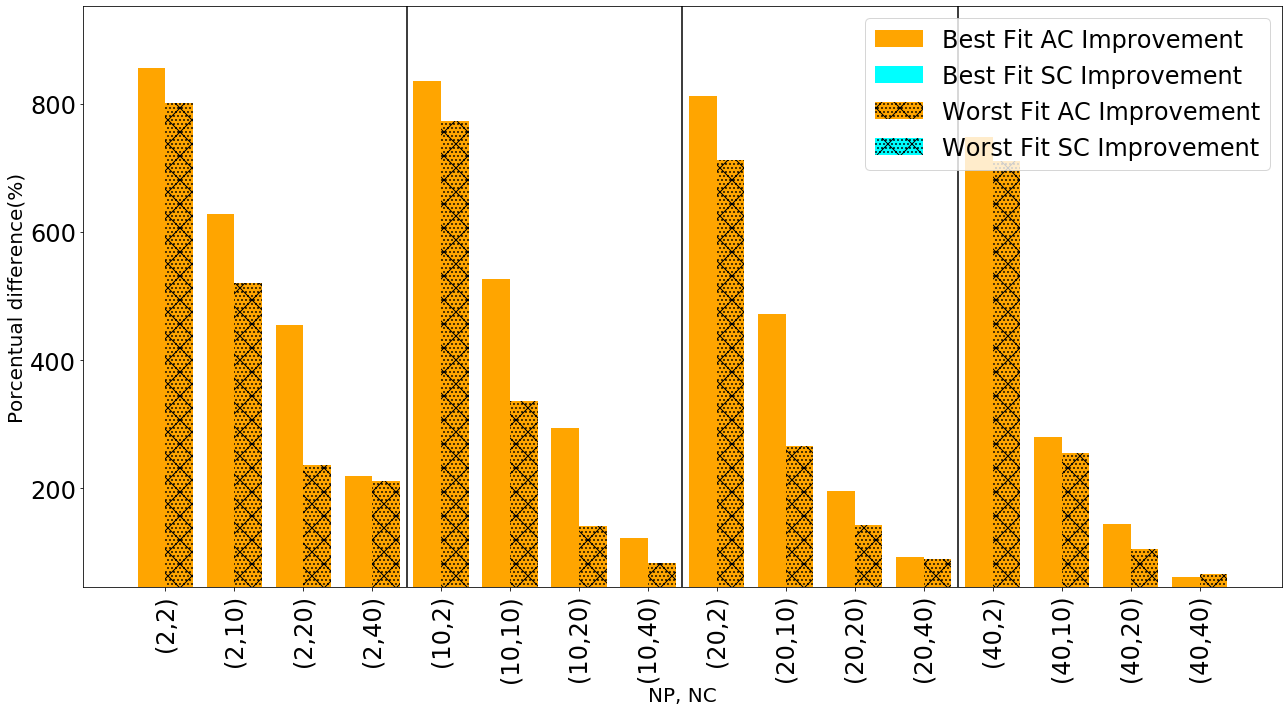

In [33]:
f=plt.figure(figsize=(18, 10))
#for numP in values:

x = np.arange(len(labelsP_J))

width = 0.4
middle = 0
ax=f.add_subplot(111)

for dist in [1,2]:
    dist_index=dist-1
    sumaTP_TM = np.add(TP_data[dist_index], TM_data[dist_index])
    bar_res = np.add(sumaTP_TM, TH_data[dist_index])

    sumaTP_TM_A = np.add(TP_A_data[dist_index], TM_A_data[dist_index])
    sumaTP_TM_A = np.add(sumaTP_TM_A, TH_A_data[dist_index])
    
    bar_res = np.divide(bar_res, sumaTP_TM_A)
    bar_res = (bar_res-1)*100

    supper = np.ma.masked_where(bar_res < middle, bar_res)
    slower = np.ma.masked_where(bar_res > middle, bar_res)

    plt.ylim(min(bar_res)-20, max(bar_res)+150) #FIXME Error cuando el max o min de dist=1 es mayor que el de dist=2

    offset = -width/2 # Best Fit
    patch = ""
    if dist == 2:
        offset = (width/2) # Worst Fit
        patch = "\\/..."
        
    ax.bar(x+offset, supper, width, color="orange", hatch=patch)
    ax.bar(x+offset, slower, width, color="cyan", hatch=patch)


ax.set_ylabel("Porcentual difference(%)", fontsize=20)
ax.set_xlabel("NP, NC", fontsize=20)
plt.xticks(x, labelsP_J, rotation=90)


orange_Bf_patch = mpatches.Patch(facecolor='orange', label='Best Fit AC Improvement')
blue_Bf_patch = mpatches.Patch(facecolor='cyan', label='Best Fit SC Improvement')
orange_Wf_patch = mpatches.Patch(hatch='\\/...', facecolor='orange', label='Worst Fit AC Improvement')
blue_Wf_patch = mpatches.Patch(hatch='\\/...', facecolor='cyan', label='Worst Fit SC Improvement')
handles=[orange_Bf_patch, blue_Bf_patch, orange_Wf_patch, blue_Wf_patch]
plt.legend(handles=handles, loc='upper right', fontsize=24)

ax.axhline((middle), color='black')
ax.axvline((3.5), color='black')
ax.axvline((7.5), color='black')
ax.axvline((11.5), color='black')
    
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=22)
    #ax.axvline(4)
    
f.tight_layout()
f.savefig("Images/EX_Difference.png", format="png")
j = (j+1)%5

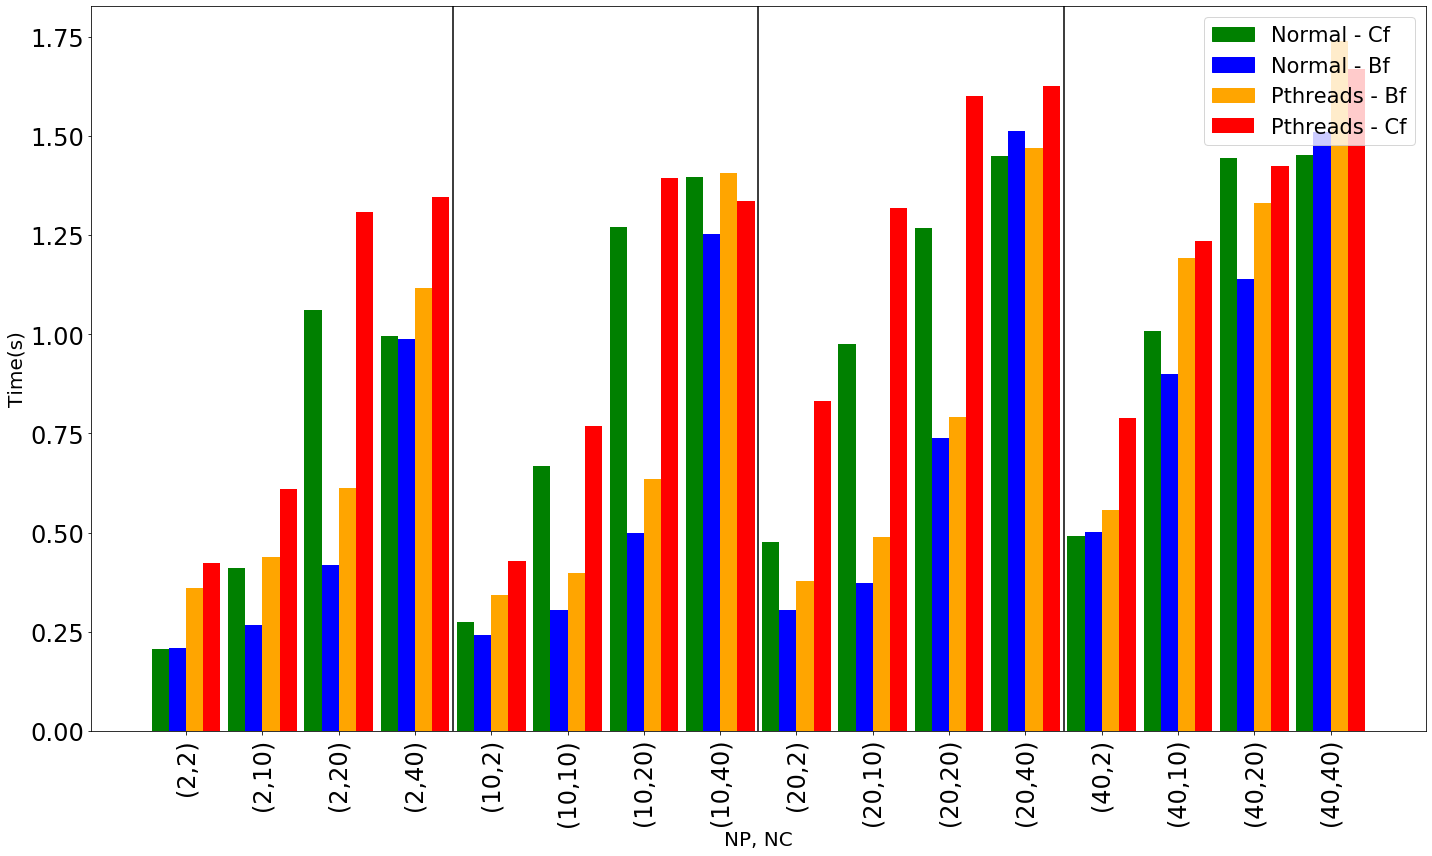

In [73]:
f=plt.figure(figsize=(20, 12))
#for numP in values:

#mpict=[73.51697466666666, 65.51325966666666, 52.19395466666668, 34.024326, 
#       60.883046666666665, 6.740908999999999, 4.857252666666667, 8.431013333333334, 
#       8.392006666666667, 9.646620333333333, 8.497321000000001, 12.982642333333333, 
#       8.007896666666667, 9.762626333333332, 6.662559000000001, 5.316057333333333]
#mpivar=[75.53585966666667, 69.56025666666666, 18.082787666666665, 154.39648000000003,
#        11.998184, 1.27766, 2.194493, 2.2691966666666668,
#        1.8346349999999998, 1.7718876666666665, 1.6892053333333334, 1.5759526666666668,
#        1.9237193333333333, 1.1625573333333332, 1.2879283333333333, 0.850577]
#threadct=[2.0040453333333335, 2.00311, 2.6234766666666665, 2.699171666666667,
#          2.0707343333333337, 2.2307106666666665, 4.222584666666666, 4.246569666666667,
#          4.020083, 4.503111666666666, 5.467942333333333, 5.048009,
#          3.8683916666666662, 4.705335000000001, 5.640752666666667, 5.811503999999999]
#threadvar=[1.9998449999999999, 2.000283666666667, 2.957152666666667, 2.401677,
#           0.8674843333333334, 0.6187566666666666, 1.3398349999999999, 1.735828,
#           1.4827233333333334, 1.245435, 1.7185836666666665, 1.7706360000000003,
#           1.645278, 1.414596666666667, 1.6812523333333333, 1.5372543333333333]

threadbf = [0.3616343333333334, 0.4390483333333333, 0.6118543333333334, 1.116497, 
            0.34279300000000007, 0.39713933333333334, 0.6350386666666668, 1.4056896666666667, 
            0.37821333333333335, 0.488335, 0.7908086666666666, 1.4691523333333334, 
            0.5579729999999999, 1.1923566666666667, 1.3307016666666667, 1.7391976666666666]

threadcf = [0.42423133333333335, 0.6090126666666666, 1.3089426666666668, 1.3461553333333331,
            0.427392, 0.7682310000000001, 1.3941153333333334, 1.3357656666666664, 
            0.8323596666666666, 1.318649, 1.5996213333333333, 1.6247436666666666, 
            0.7896679999999999, 1.2355183333333333, 1.4249120000000002, 1.6693683333333331]

normalbf = [0.2083043333333333, 0.2661843333333333, 0.41778833333333326, 0.9868953333333335,
            0.242685, 0.3060793333333333, 0.4986676666666667, 1.2530743333333334, 
            0.305179, 0.373607, 0.7375183333333334, 1.5113886666666667, 
            0.501651, 0.8987069999999999, 1.138518666666667, 1.5091376666666665]

normalcf = [0.205789, 0.4116923333333334, 1.0607546666666667, 0.9947066666666666, 
            0.27494700000000005, 0.669121, 1.2705783333333334, 1.3951336666666665, 
            0.4765406666666667, 0.9758123333333333, 1.267633, 1.4479673333333334, 
            0.4905743333333333, 1.0088953333333333, 1.4447113333333332, 1.4516683333333333]

x = np.arange(len(labelsP_J))

width = 0.45/2

ax=f.add_subplot(111)

ax.bar(x-width/2, normalbf, width, hatch="", color='blue')

ax.bar(x-width*1.5, normalcf, width, hatch="",color='green')

ax.bar(x+width/2, threadbf, width, hatch="", color='orange')

ax.bar(x+width*1.5, threadcf, width, hatch="", color='red')

ax.set_ylabel("Time(s)", fontsize=20)
ax.set_xlabel("NP, NC", fontsize=20)
plt.xticks(x, labelsP_J, rotation=90)

normalbf_patch = mpatches.Patch(color='blue', label='Normal - Bf')
normalcf_patch = mpatches.Patch(color='green', label='Normal - Cf')
threadbf_patch = mpatches.Patch(color='orange', label='Pthreads - Bf')
threadcf_patch = mpatches.Patch(hatch='', facecolor='red', label='Pthreads - Cf')


handles=[normalcf_patch,normalbf_patch,threadbf_patch,threadcf_patch]

plt.legend(handles=handles, loc='upper right', fontsize=21)
    
ax.axvline((3.5), color='black')
ax.axvline((7.5), color='black')
ax.axvline((11.5), color='black')
    
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=22)
    #ax.axvline(4)
#plt.ylim((0, 15))
    
f.tight_layout()
f.savefig("Images/Mall_AR.png", format="png")
j = (j+1)%5

In [8]:
labels = ['(1,10)', '(1,20)', '(1,40)','(1,80)','(1,160)',
            '(10,1)', '(10,20)', '(10,40)','(10,80)','(10,160)',
            '(20,1)',  '(20,10)','(20,40)','(20,80)','(20,160)',
            '(40,1)',  '(40,10)',  '(40,20)','(40,80)','(40,160)',
            '(80,1)',  '(80,10)',  '(80,20)', '(80,40)','(80,160)',
            '(160,1)', '(160,10)', '(160,20)','(160,40)','(160,80)']

labelsExpand = ['(1,10)', '(1,20)', '(1,40)','(1,80)','(1,160)',
               '(10,20)', '(10,40)','(10,80)','(10,160)',
               '(20,40)','(20,80)','(20,160)',
               '(40,80)','(40,160)',
               '(80,160)']
labelsShrink = ['(10,1)', 
               '(20,1)',  '(20,10)', 
               '(40,1)',  '(40,10)',  '(40,20)',
               '(80,1)',  '(80,10)',  '(80,20)', '(80,40)',
               '(160,1)', '(160,10)', '(160,20)','(160,40)','(160,80)']

labelsExpandIntra = ['(1,10)', '(1,20)','(10,20)']
labelsShrinkIntra = ['(10,1)', '(20,1)', '(20,10)']
labelsExpandInter = ['(1,40)','(1,80)', '(1,160)',
               '(10,40)','(10,80)', '(10,160)',
               '(20,40)','(20,80)', '(20,160)',
               '(40,80)', '(40,160)',
               '(80,160)']
labelsShrinkInter = ['(40,1)', '(40,10)', '(40,20)',
               '(80,1)', '(80,10)', '(80,20)','(80,40)',
               '(160,1)', '(160,10)', '(160,20)','(160,40)', '(160,80)']

                #0          #1                 #2                     #3
labelsMethods = ['Baseline', 'Baseline single','Baseline - Pthreads','Baseline single - Pthreads',
                 'Merge','Merge single','Merge - Pthreads','Merge single - Pthreads']
                 #4      #5             #6                 #7

OrMult_patch = mpatches.Patch(hatch='', facecolor='green', label='Baseline')
OrSing_patch = mpatches.Patch(hatch='', facecolor='springgreen', label='Baseline single')
OrPthMult_patch = mpatches.Patch(hatch='//', facecolor='blue', label='Baseline - Pthreads')
OrPthSing_patch = mpatches.Patch(hatch='\\', facecolor='darkblue', label='Baseline single - Pthreads')
MergeMult_patch = mpatches.Patch(hatch='||', facecolor='red', label='Merge')
MergeSing_patch = mpatches.Patch(hatch='...', facecolor='darkred', label='Merge single')
MergePthMult_patch = mpatches.Patch(hatch='xx', facecolor='yellow', label='Merge - Pthreads')
MergePthSing_patch = mpatches.Patch(hatch='++', facecolor='olive', label='Merge single - Pthreads')

In [9]:
def get_types_iker(checked_type='tc', used_direction='e', node_type="All", normality='m'):
    if checked_type=='te':
        var_aux='TE'
        tipo_fig="TE"
        grouped_aux=grouped_aggG2
    elif checked_type=='tc':
        var_aux='TC'
        tipo_fig="Mall"
        grouped_aux=grouped_aggM
    
    if node_type=='Intra':
        grouped_aux=grouped_aux.query('NP < 21 and NS < 21')
    elif node_type=='Inter':
        grouped_aux=grouped_aux.query('NP > 21 or NS > 21')
    
    if used_direction=='s':
        grouped_aux=grouped_aux.query('NP > NS')
        if node_type=='Intra':
            used_labels=labelsShrinkIntra
        elif node_type=='Inter':
            used_labels=labelsShrinkInter
        elif node_type=='All':
            used_labels=labelsShrink
        name_fig="Shrink"
        
        if normality=='r':
            handles=[OrSing_patch,OrPthMult_patch,OrPthSing_patch,MergeMult_patch,MergePthMult_patch]
        else:
            handles=[OrMult_patch,OrSing_patch,OrPthMult_patch,OrPthSing_patch,MergeMult_patch,MergePthMult_patch]
    elif used_direction=='e':
        grouped_aux=grouped_aux.query('NP < NS')
        if node_type=='Intra':
            used_labels=labelsExpandIntra
        elif node_type=='Inter':
            used_labels=labelsExpandInter
        elif node_type=='All':
            used_labels=labelsExpand
        name_fig="Expand"
        if normality=='r':
            handles=[OrSing_patch,OrPthMult_patch,OrPthSing_patch,MergeMult_patch,MergeSing_patch,MergePthMult_patch,MergePthSing_patch]
        else:
            handles=[OrMult_patch,OrSing_patch,OrPthMult_patch,OrPthSing_patch,MergeMult_patch,MergeSing_patch,MergePthMult_patch,MergePthSing_patch]

    title=tipo_fig+"_Spawn_"+node_type+"_"+name_fig+"_"+normality
    return var_aux, grouped_aux, handles, used_labels, title

In [10]:
def obtain_arrays_iker(grouped_aux, var_aux, used_direction='e', normality='m'):
    vOrMult = list(grouped_aux.query('Cst == "0" and Css == "0"')[var_aux])
    vOrSingle = list(grouped_aux.query('Cst == "0" and Css == "1"')[var_aux])
    vMergeMult = list(grouped_aux.query('Cst == "2" and Css == "0"')[var_aux])
    
    if var_aux == 'TC': # Para el tiempo TC se utiliza el que no tiene en cuenta la app para los hilos
        vOrPthMult = list(grouped_aux.query('Cst == "1" and Css == "0"')['TH'])
        vOrPthSingle = list(grouped_aux.query('Cst == "1" and Css == "1"')['TH'])
        vMergePthMult = list(grouped_aux.query('Cst == "3" and Css == "0"')['TH'])
    else:
        vOrPthMult = list(grouped_aux.query('Cst == "1" and Css == "0"')[var_aux])
        vOrPthSingle = list(grouped_aux.query('Cst == "1" and Css == "1"')[var_aux])
        vMergePthMult = list(grouped_aux.query('Cst == "3" and Css == "0"')[var_aux])

    
    if used_direction=='e':
        vMergeSingle = list(grouped_aux.query('Cst == "2" and Css == "1"')[var_aux])
        if var_aux == 'TC': # Para el tiempo TC se utiliza el que no tiene en cuenta la app para los hilos
            vMergePthSingle = list(grouped_aux.query('Cst == "3" and Css == "1"')['TH'])
        else:
            vMergePthSingle = list(grouped_aux.query('Cst == "3" and Css == "1"')[var_aux])
    else:
        #FIXME Que tenga en cuenta TH al realizar shrink merge
        vMergePthMult = list(grouped_aux.query('Cst == "3" and Css == "0"')[var_aux])
        vMergeSingle = None
        vMergePthSingle = None
    title_y = "Total time(s)"
        
    if normality == 'r':
        vOrSingle = np.subtract(vOrMult, vOrSingle)
        vOrPthMult = np.subtract(vOrMult, vOrPthMult)
        vOrPthSingle = np.subtract(vOrMult, vOrPthSingle)
        vMergeMult = np.subtract(vOrMult, vMergeMult)
        vMergePthMult = np.subtract(vOrMult, vMergePthMult)
        if used_direction=='e':
            vMergeSingle = np.subtract(vOrMult, vMergeSingle)
            vMergePthSingle = np.subtract(vOrMult, vMergePthSingle)
        vOrMult = None
        title_y = "Saved time(s)"
    elif normality == 'n':
        vOrSingle = np.divide(vOrSingle, vOrMult)
        vOrPthMult = np.divide(vOrPthMult, vOrMult)
        vOrPthSingle = np.divide(vOrPthSingle, vOrMult)
        vMergeMult = np.divide(vMergeMult, vOrMult)
        vMergePthMult = np.divide(vMergePthMult, vOrMult)
        if used_direction=='e':
            vMergeSingle = np.divide(vMergeSingle, vOrMult)
            vMergePthSingle = np.divide(vMergePthSingle, vOrMult)
        vOrMult = np.divide(vOrMult, vOrMult)
        title_y = "Relation Config time / Baseline Time"
    
    data_array=[vOrMult,vOrSingle,vOrPthMult,vOrPthSingle,vMergeMult,vMergeSingle,vMergePthMult,vMergePthSingle]
    return data_array, title_y



In [11]:
def legend_loc_iker(data_array, len_x):
    max_value = np.nanmax([x for x in data_array if x is not None]) # Los valores None es necesario evitarlos
    min_value = np.nanmin([x for x in data_array if x is not None]) # Los valores None es necesario evitarlos
    if(min_value < 0):
        min_value = 0
    middle_value = (max_value + min_value) / 2
    offset = (max_value - min_value) * 0.1
    
    def array_check_loc(ini, end):
        up = True
        lower = True
        for i in range(ini, end):
            for j in range(len(data_array)):
                if not (data_array[j] is None):
                    if data_array[j][i] > (middle_value + offset):
                        up = False
                    elif data_array[j][i] < (middle_value - offset):
                        lower = False
                    if not up and not lower:
                        break
            else:
                continue # Only executed if inner loop did NOT break
            break # Only executed if inner loop did break
        return up,lower
    
    up_left, lower_left = array_check_loc(0, math.floor(len_x/2))
    up_right, lower_right = array_check_loc(0, math.floor(len_x/2))

    legend_loc = 'best'
    if up_left:
        legend_loc = 'upper left'
    elif up_right:
        legend_loc = 'upper right'
    elif lower_left:
        legend_loc = 'lower left'
    elif lower_right:
        lower_right = 'lower right'

    return legend_loc
        

In [12]:
def graphic_iker(data_array, title="None", title_y="None", title_x="None", handles=None, used_labels=None, ylim_zero=True):
    f=plt.figure(figsize=(30, 12))
    ax=f.add_subplot(111)
    x = np.arange(len(used_labels))
    width = 0.45/4
    
    legend_loc = legend_loc_iker(data_array, len(used_labels))

    if not (data_array[0] is None):
        ax.bar(x-width*3.5, data_array[0], width, color='green')
    ax.bar(x-width*2.5, data_array[1], width, hatch="", color='springgreen')
    ax.bar(x-width*1.5, data_array[2], width, hatch="//", color='blue')
    ax.bar(x-width*0.5, data_array[3], width, hatch="\\",color='darkblue')

    ax.bar(x+width*0.5, data_array[4], width, hatch="||", color='red')
    if not (data_array[5] is None):
        ax.bar(x+width*1.5, data_array[5], width, hatch="...", color='darkred')
        ax.bar(x+width*2.5, data_array[6], width, hatch="xx", color='yellow')
    else:
        ax.bar(x+width*1.5, data_array[6], width, hatch="xx", color='yellow')
    if not (data_array[7] is None):
        ax.bar(x+width*3.5, data_array[7], width, hatch="++",color='olive')

    ax.axhline((0), color='black', linestyle='dashed')
    ax.set_ylabel(title_y, fontsize=20)
    ax.set_xlabel(title_x, fontsize=20)
    plt.xticks(x, used_labels, rotation=90)
    plt.legend(handles=handles, loc=legend_loc, fontsize=21,ncol=2)
    
    if not ylim_zero: # Modifica los limites del eje y. No es buena practica que no aparezca el 0
        max_value = np.nanmax([x for x in data_array if x is not None]) # Los valores None es necesario evitarlos
        max_value += max_value * 0.1
        min_value = np.nanmin([x for x in data_array if x is not None]) # Los valores None es necesario evitarlos
        min_value -= min_value * 0.1
        if min_value < 0.1:
            min_value = 0
        plt.ylim((min_value, max_value))
    
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.tick_params(axis='both', which='minor', labelsize=22)
    
    f.tight_layout()
    f.savefig("Images/Spawn/"+title+".png", format="png")

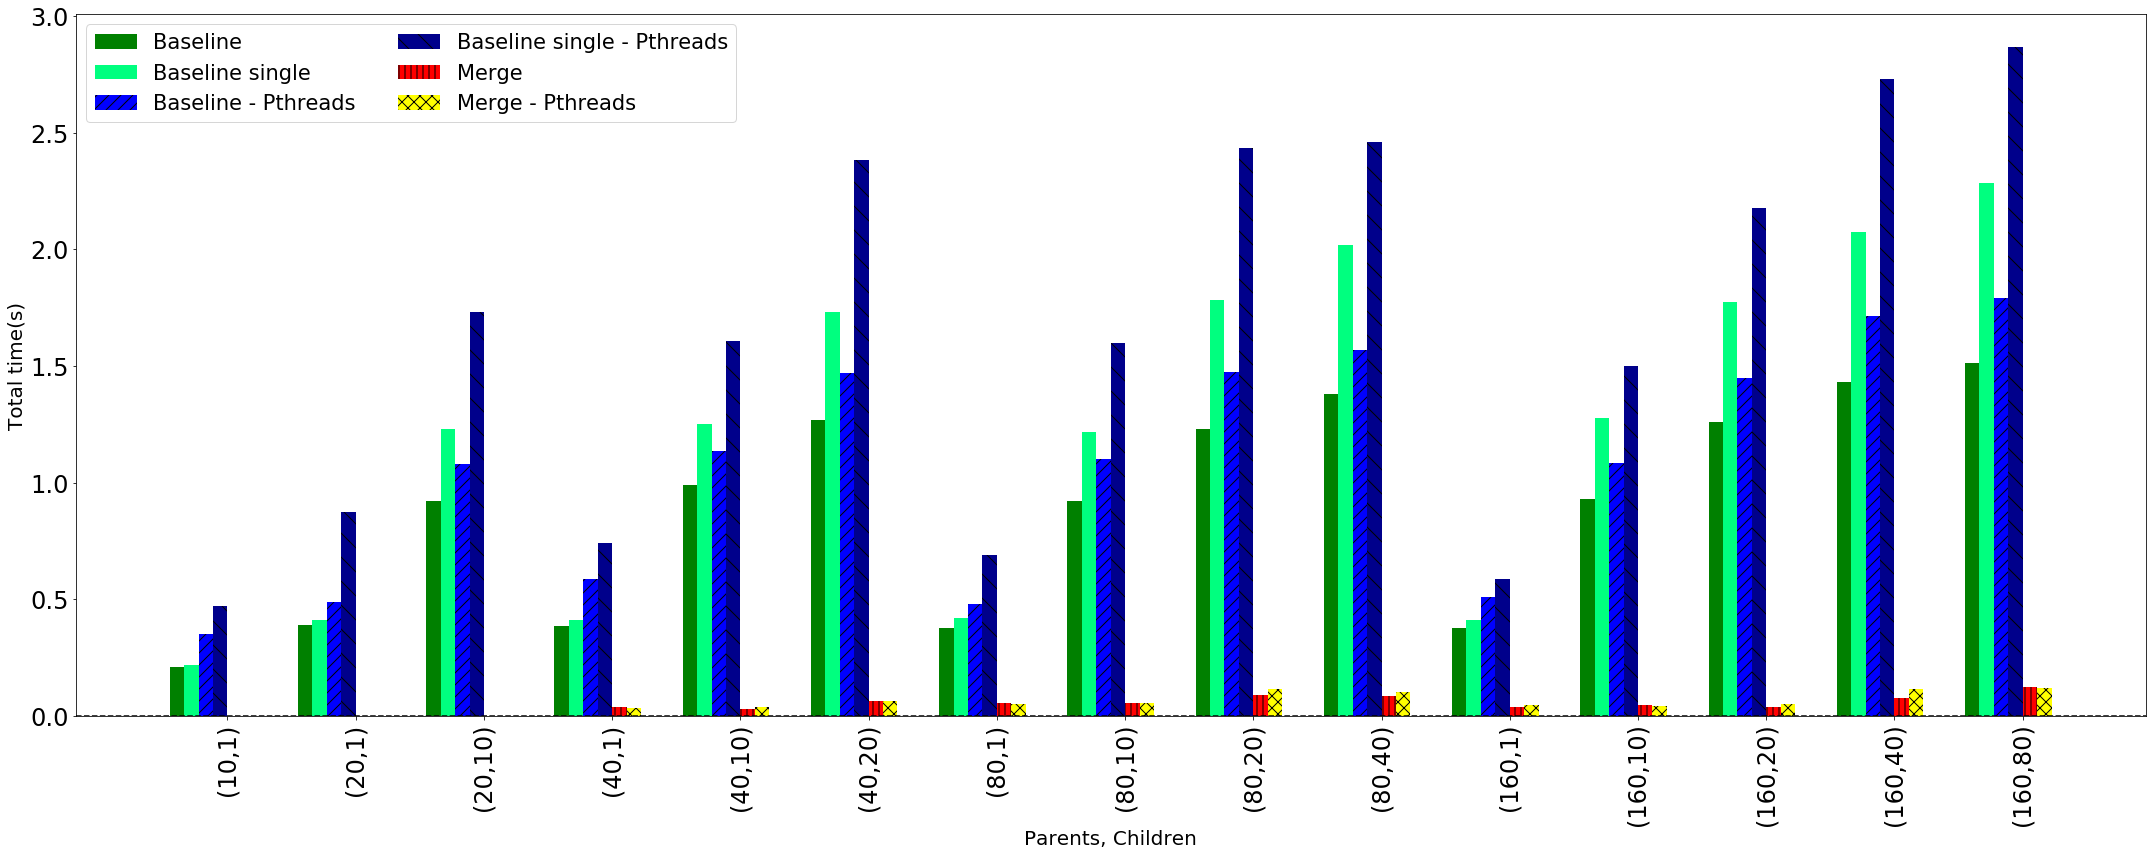

In [189]:
checked_type='tc' # Valores 'te' y 'tc'
used_direction='s' # Valores 's' y 'e'
node_type='All' # Valores 'Intra', 'Inter', 'All'
normality='m'
#Values 'n' (normalizar), 'l' (logaritmico), 'm' (sin modificaciones), 'r' (Comparar respecto al primero)

ylim_zero = True

var_aux, grouped_aux, handles, used_labels, title = get_types_iker(checked_type, used_direction, node_type, normality)
array_aux, title_y = obtain_arrays_iker(grouped_aux, var_aux, used_direction, normality)
graphic_iker(array_aux, title, title_y, "Parents, Children", handles, used_labels, ylim_zero)

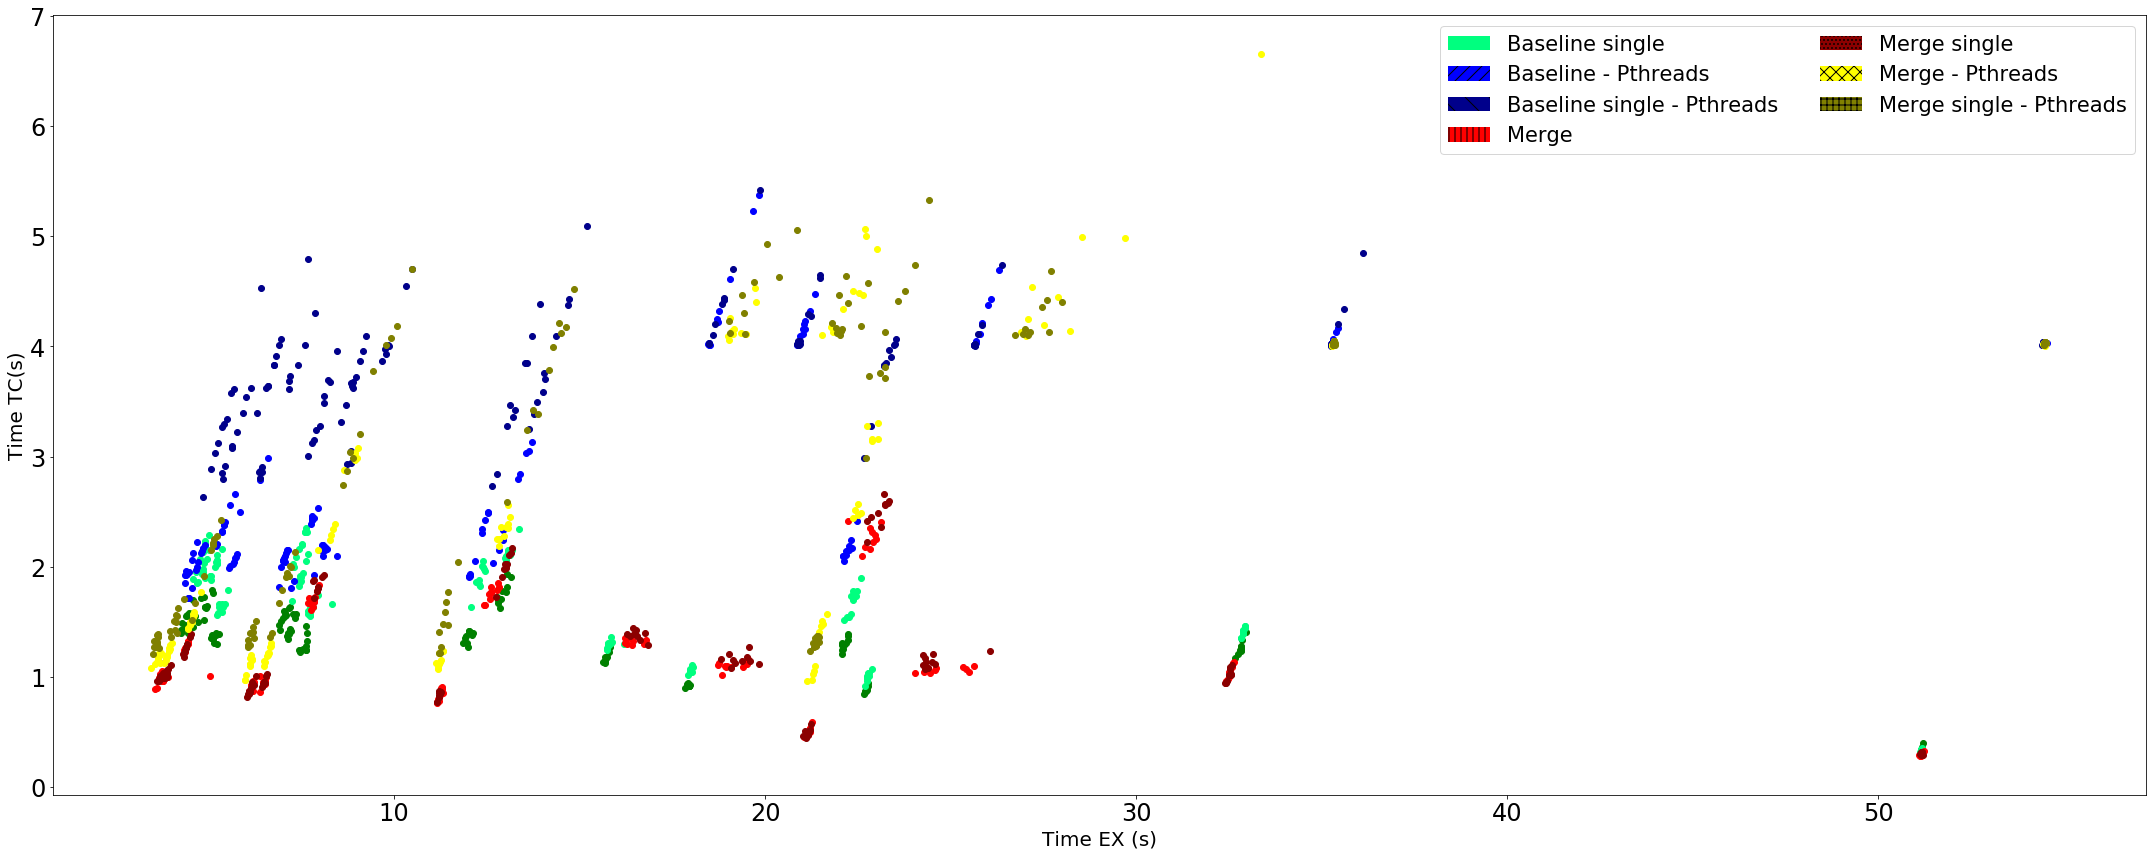

In [21]:
used_direction='e'
    
if used_direction=='s':
    dfM_aux=dfM.query('NP > NS')
    dfG_aux=dfG.query('NP > NS')
    used_labels=labelsShrink
    name_fig="Shrink"
    handles=[OrSing_patch,OrPthMult_patch,OrPthSing_patch,MergeMult_patch,MergePthMult_patch]
elif used_direction=='e':
    dfM_aux=dfM.query('NP < NS')
    dfG_aux=dfG.query('NP < NS')
    used_labels=labelsExpand
    name_fig="Expand"
    handles=[OrSing_patch,OrPthMult_patch,OrPthSing_patch,MergeMult_patch,MergeSing_patch,MergePthMult_patch,MergePthSing_patch]
# < Expand
# > Shrink

vOrMult = list(dfG_aux.query('Cst == "0" and Css == "0"')['TE'])
vOrSingle = list(dfG_aux.query('Cst == "0" and Css == "1"')['TE'])
vOrPthMult = list(dfG_aux.query('Cst == "1" and Css == "0"')['TE'])
vOrPthSingle = list(dfG_aux.query('Cst == "1" and Css == "1"')['TE'])

vMergeMult = list(dfG_aux.query('Cst == "2" and Css == "0"')['TE'])
vMergeSingle = list(dfG_aux.query('Cst == "2" and Css == "1"')['TE'])
vMergePthMult = list(dfG_aux.query('Cst == "3" and Css == "0"')['TE'])
vMergePthSingle = list(dfG_aux.query('Cst == "3" and Css == "1"')['TE'])

vOrMult2 = list(dfM_aux.query('Cst == "0" and Css == "0"')['TC'])
vOrSingle2 = list(dfM_aux.query('Cst == "0" and Css == "1"')['TC'])
vOrPthMult2 = list(dfM_aux.query('Cst == "1" and Css == "0"')['TC'])
vOrPthSingle2 = list(dfM_aux.query('Cst == "1" and Css == "1"')['TC'])

vMergeMult2 = list(dfM_aux.query('Cst == "2" and Css == "0"')['TC'])
vMergeSingle2 = list(dfM_aux.query('Cst == "2" and Css == "1"')['TC'])
vMergePthMult2 = list(dfM_aux.query('Cst == "3" and Css == "0"')['TC'])
vMergePthSingle2 = list(dfM_aux.query('Cst == "3" and Css == "1"')['TC'])

f=plt.figure(figsize=(30, 12))
ax=f.add_subplot(111)

ax.scatter(vOrMult,vOrMult2, color='green')
ax.scatter(vOrSingle,vOrSingle2,  color='springgreen')
ax.scatter(vOrPthMult,vOrPthMult2, color='blue')
ax.scatter(vOrPthSingle,vOrPthSingle2,color='darkblue')

ax.scatter(vMergeMult,vMergeMult2, color='red')
if used_direction=='e':
    ax.scatter(vMergeSingle,vMergeSingle2,color='darkred')
ax.scatter(vMergePthMult,vMergePthMult2, color='yellow')
if used_direction=='e':
    ax.scatter(vMergePthSingle,vMergePthSingle2,color='olive')

ax.set_ylabel("Time TC(s)", fontsize=20)
ax.set_xlabel("Time EX (s)", fontsize=20)
#plt.xticks(x, used_labels, rotation=90)
plt.legend(handles=handles, loc='upper right', fontsize=21,ncol=2)
    
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=22)
    
f.tight_layout()
f.savefig("Images/Spawn/Dispersion_Spawn_"+name_fig+"_Diff.png", format="png")

In [13]:
normality=True
total=0
#Comprobar para cada configuración si se sigue una distribución normal/gaussiana
for np_aux in processes:
    for ns_aux in processes:
        if np_aux != ns_aux:
            for cst_aux in ['0','1','2','3']:
                for css_aux in ['0','1']:
                    dataList = list(dfG.query('NP == @np_aux and NS == @ns_aux and Cst == @cst_aux and Css == @css_aux')['TE'])
                    st,p = stats.shapiro(dataList) # Tendrían que ser al menos 20 datos
                    if p < p_value:
                        normality=False
                        total+=1
                        #print("Se renuncia a H0")   
                        #print(np_aux, ns_aux, cst_aux, css_aux, st, p)
                    #else:
                        #print("Se acepta H0") #H0 es aceptar una distribución Gaussiana
                        #print(np_aux, ns_aux, cst_aux, css_aux, st, p)
                        
    
print("Se sigue una distribución guassiana: " + str(normality)+ "\nHan fallado un total de: " + str(total))

Se sigue una distribución guassiana: False
Han fallado un total de: 46


In [14]:
#Función para comprobar medias de distribuciones no normales
def check_means(dataLists, np_aux, ns_aux, shrink):
    st,p=stats.kruskal(dataLists[0],dataLists[1],dataLists[2],dataLists[3],dataLists[4],dataLists[5],dataLists[6],dataLists[7])
    if p > p_value: # Si son iguales, no hay que hacer nada más
        print("Configuración: " + str(np_aux) + "/" + str(ns_aux) + " tiene medias iguales")
        return
    #else: # Si son diferentes, hay que comprobar cuales lo son
        #print("Configuración: " + str(np_aux) + "/" + str(ns_aux) + " tiene medias diferentes ---------------------------")
    
    best = 0
    otherBest=[]
    for i in range(1,8):
        st,p=stats.mannwhitneyu(dataLists[best],dataLists[i])
        if p < p_value: # Medianas diferentes
            st,p=stats.mannwhitneyu(dataLists[best],dataLists[i], alternative='greater')
            if p < p_value: # Mediana i < Mediana best -- Modificar best
                best=i
                for j in otherBest:
                    st,p=stats.mannwhitneyu(dataLists[best],dataLists[j], alternative='less')
                   
                    if p < p_value: # Media newBest < Media otherBest[j] -- Eliminar otherBest[j]
                        otherBest.remove(j)
        else: #Medias iguales
            otherBest.append(i)
    
    if shrink: # Las opciones Merge single(7) y Merge single - Pthreads(8) no se utilizan al reducir
        if 5 in otherBest:
            otherBest.remove(5)
        if 7 in otherBest:
            otherBest.remove(7)
            
    stringV=""
    for i in otherBest:
        stringV+=labelsMethods[i]+", "
    print("Redimensión " + str(np_aux) + "/" + str(ns_aux) + ": tiene los siguientes mejores: " + labelsMethods[best]+", " + stringV)
    otherBest.insert(0,best)
    return otherBest

In [18]:
checked_type='te'
if checked_type=='te':
    tipo="TE"
    data_aux=dfG
elif checked_type=='tc':
    tipo="TC"
    data_aux=dfM
    
results = []
shrink = False
for np_aux in processes:
    for ns_aux in processes:
        if np_aux != ns_aux:
            dataSet = data_aux.query('NP == @np_aux and NS == @ns_aux')
            dataLists=[]
            if np_aux > ns_aux:
                shrink = True
            else:
                shrink = False
            
            for cst_aux in ['0','1','2','3']:
                for css_aux in ['0','1']:
                    if (cst_aux == 1 or cst_aux == 3) and checked_type == 'tc': # Usar tiempo sin app para TC con hilos
                        lista_aux = list(dataSet.query('Cst == @cst_aux and Css == @css_aux')['TH'])
                    else:
                        lista_aux = list(dataSet.query('Cst == @cst_aux and Css == @css_aux')[tipo])
                    dataLists.append(lista_aux)
            aux_data = check_means(dataLists, np_aux, ns_aux, shrink)
            results.append(aux_data)

Redimensión 1/10: tiene los siguientes mejores: Baseline, Baseline single, Merge, Merge single, 
Redimensión 1/20: tiene los siguientes mejores: Merge, Merge single, 
Redimensión 1/40: tiene los siguientes mejores: Merge, Merge single, 
Redimensión 1/80: tiene los siguientes mejores: Merge, Merge single, 
Redimensión 1/160: tiene los siguientes mejores: Baseline, Merge, Merge single, 
Redimensión 10/1: tiene los siguientes mejores: Baseline single - Pthreads, 
Redimensión 10/20: tiene los siguientes mejores: Merge, 
Redimensión 10/40: tiene los siguientes mejores: Merge, Merge single, 
Redimensión 10/80: tiene los siguientes mejores: Merge, Merge single, 
Redimensión 10/160: tiene los siguientes mejores: Merge, Merge single, 
Redimensión 20/1: tiene los siguientes mejores: Baseline single - Pthreads, 
Redimensión 20/10: tiene los siguientes mejores: Baseline single - Pthreads, Merge, Merge - Pthreads, 
Redimensión 20/40: tiene los siguientes mejores: Merge, Merge single, Merge - Pthrea

In [19]:
#Lista de indices de mayor a menor de los valores
aux_array = []
for data in results:
    aux_array+=data
unique, counts = np.unique(aux_array, return_counts=True)
aux_dict = dict(zip(unique, counts))
aux_keys=list(aux_dict.keys())
aux_values=list(aux_dict.values())
aux_ordered_index=list(reversed(list(np.argsort(aux_values))))

labels_aux = [1, 10, 20, 40, 80, 160]
i=0
j=0
used_aux=0
heatmap=np.zeros((len(labels_aux),len(labels_aux))).astype(int)
for i in range(len(labels_aux)):
    for j in range(len(labels_aux)):
        if i==j:
            heatmap[i][j]=-1
            used_aux+=1
        else:
            results_index = i*len(labels_aux) +j-used_aux
            for index in aux_ordered_index:
                if aux_keys[index] in results[results_index]:
                    heatmap[i][j]=aux_keys[index]
                    break
heatmap[len(labels_aux)-1][len(labels_aux)-1]=8
print(heatmap)

[[-1  4  4  4  4  4]
 [ 3 -1  4  4  4  4]
 [ 3  4 -1  4  4  4]
 [ 3  3  4 -1  4  4]
 [ 3  3  3  4 -1  6]
 [ 3  3  3  3  4  8]]


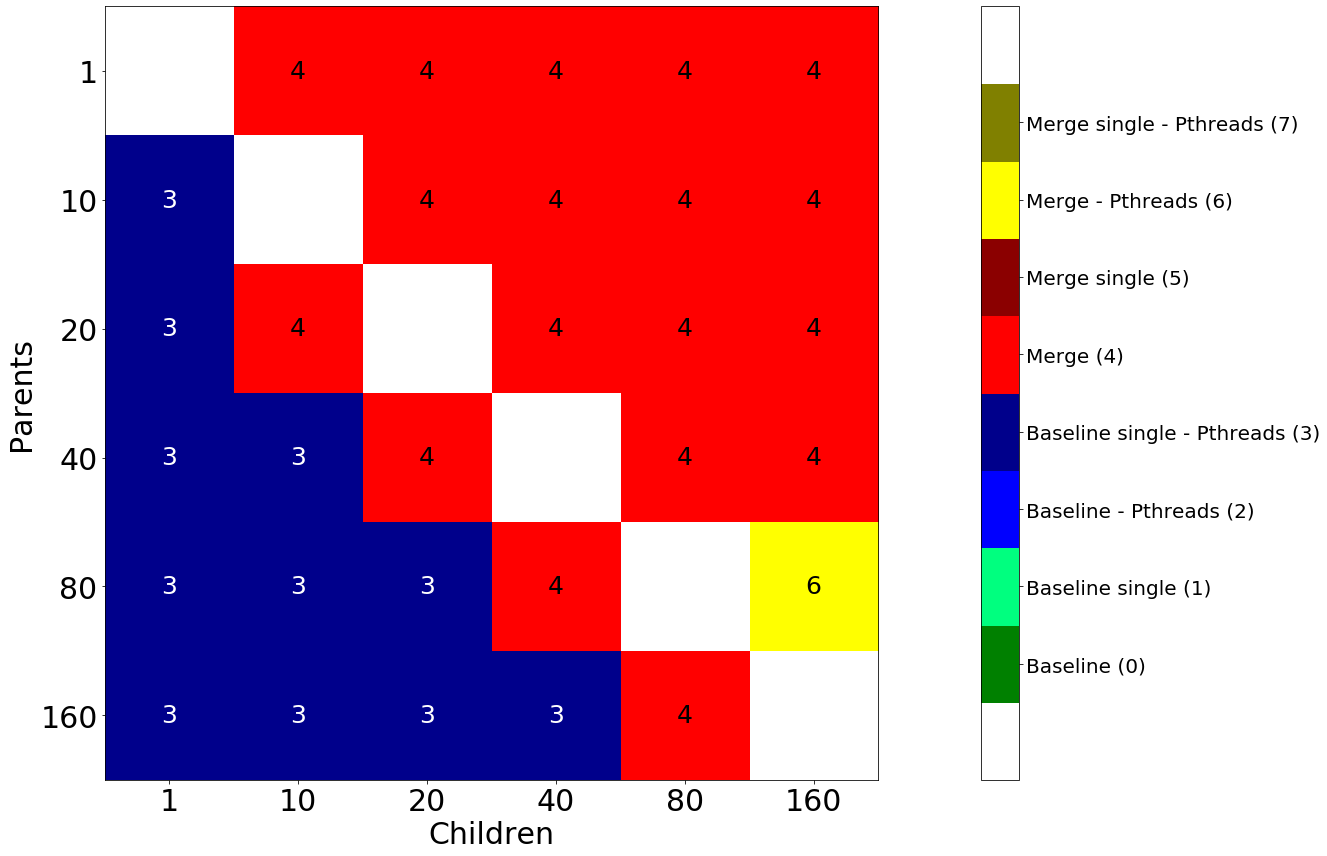

In [20]:
#Crea un heatmap teniendo en cuenta los colores anteriores
f=plt.figure(figsize=(30, 12))
ax=f.add_subplot(111)

myColors = (colors.to_rgba("white"),colors.to_rgba("green"), colors.to_rgba("springgreen"),colors.to_rgba("blue"),colors.to_rgba("darkblue"),
            colors.to_rgba("red"),colors.to_rgba("darkred"),colors.to_rgba("yellow"),colors.to_rgba("olive"),colors.to_rgba("white"))
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

im = ax.imshow(heatmap,cmap=cmap,interpolation='nearest')

# Loop over data dimensions and create text annotations.
for i in range(len(labels_aux)):
    for j in range(len(labels_aux)):
        if i!=j:
            if heatmap[i, j] == 2 or heatmap[i, j] == 3:
                text = ax.text(j, i, heatmap[i, j],
                       ha="center", va="center", color="white", fontsize=25)
            else:
                text = ax.text(j, i, heatmap[i, j],
                       ha="center", va="center", color="black", fontsize=25)

ax.set_ylabel("Parents", fontsize=30)
ax.set_xlabel("Children", fontsize=30)

ax.set_xticklabels(['']+labels_aux, fontsize=30)
ax.set_yticklabels(['']+labels_aux, fontsize=30)

#
labelsMethods_aux = ['Invalid (-1)','Baseline (0)', 'Baseline single (1)','Baseline - Pthreads (2)','Baseline single - Pthreads (3)',
                 'Merge (4)','Merge single (5)','Merge - Pthreads (6)','Merge single - Pthreads (7)','Invalid (8)']
colorbar=f.colorbar(im, ax=ax)
colorbar.set_ticks([-2.55, 0.35, 1.25, 2.15, 3.05, 3.95, 4.85, 5.75, 6.65]) #TE
#colorbar.set_ticks([-2.55, 0.35, 1.25, 2.15, 3.05, 3.95, 4.85, 5.75, 6.65]) #TC
colorbar.set_ticklabels(labelsMethods_aux)
colorbar.ax.tick_params(labelsize=20)
#

f.tight_layout()
f.savefig("Images/Spawn/Heatmap_"+tipo+".png", format="png")

In [100]:
from sklearn import linear_model
import statsmodels.api as sm

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])

X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Stock_Index_Price']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
New_Interest_Rate = 2.75
New_Unemployment_Rate = 5.3
print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 1798.4039776258546
Coefficients: 
 [ 345.54008701 -250.14657137]
Predicted Stock Index Price: 
 [1422.86238865]
                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           4.04e-11
Time:                        16:10:06   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]

/home/usuario/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
